In [84]:
import tess_stitch as tea
import big_data_funs as bd
import os
import matplotlib.pyplot as plt
from importlib import reload
from pathlib import Path
reload(tea)

'''
Código para hacer análisis fino (Lo voy a utilizar solo para TOI-4010, el resto en tess_tea_multiple)
'''


In [86]:
TARGET = "TOI-4010"
METODO = "LCF"  # LCF o TPF
PCA_COMPONENTS = 5 

In [87]:
lc_stitched = tea.get_multisector_lc(
    TARGET, 
    method=METODO, 
    pca_components=PCA_COMPONENTS
)

if lc_stitched is not None:
    
    lc_clean = tea.clean_lc(lc_stitched, window_length=2001, sigma=5)

    star_data = tea.get_stellar_params(TARGET)
    
else:
    print("No se pudieron obtener datos para el análisis.")

--- Buscando datos para TOI-4010 [LCF] ---
Sectores totales encontrados: 5

 ---- Parámetros estelares obtenidos ----




--- RESULTADOS FÍSICOS ---

Radio Planeta: 5.99 R_earth
Distancia semi-eje mayor(a): 0.0560 UA

 ---- Plots guardados en carpeta: resultados-TOI-4010\resultados_TOI-4010 c_LCF_stitching ----- 



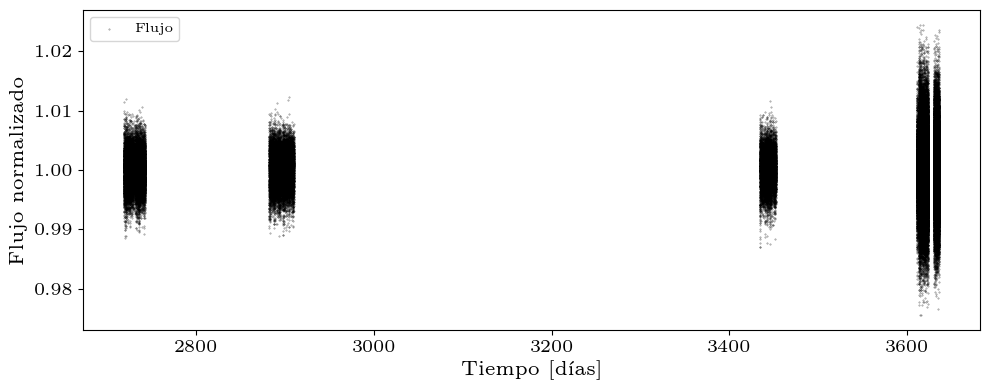

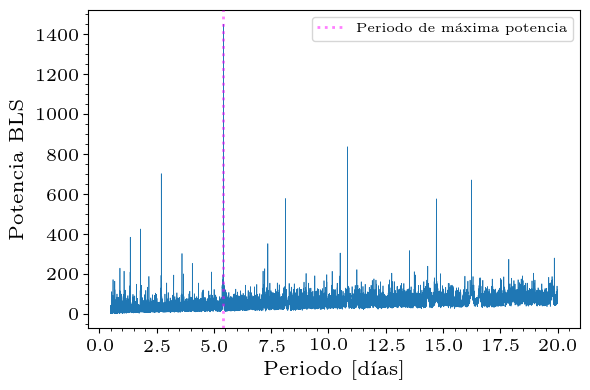

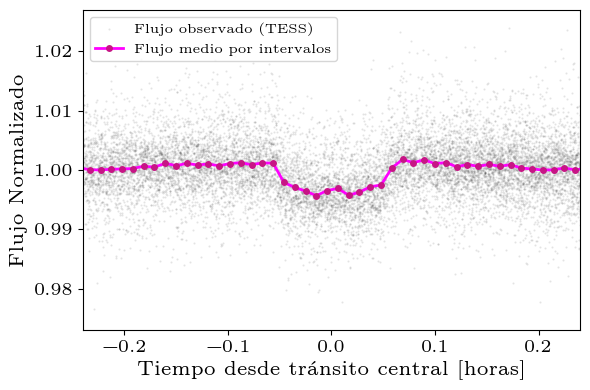

In [88]:
# TEMPORAL: SOLO PARA DATOS NEA
# df = bd.cargar_datos_NEA("small_data")


# Cambia min_p y max_p para afinar qué periodo quieres observar
bls_results = tea.bls(lc_clean, min_p=0.5, max_p=20, n_points=100000)

# Planet name para guardar mejor los datos 
planet_name = "TOI-4010 c"

params = tea.compute_params(bls_results, star_data, lc = lc_clean)

folder = f"resultados_{planet_name}_{METODO}_stitching"
SAVE_PATH = Path(f"resultados-{TARGET}") / folder
SAVE_PATH.mkdir(parents=True, exist_ok=True)

# SAVE_PATH = None


tea.plots(lc_clean, bls_results, target_name=TARGET, save_path=SAVE_PATH, planet_name = planet_name, method = METODO)

In [71]:
data_export = tea.pack_results(TARGET, planet_name, bls_results, star_data, params)

# data_export = tea.pack_results_NEA(TARGET, planet_name, bls_results, star_data, params, df)

tea.save_json(data_export, SAVE_PATH)

JSON guardado correctamente en: resultados-TOI-4010_NEA\resultados_TOI-4010 d_LCF_stitching\TOI-4010 d.json
